In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [ ]:
data=pd.read_csv('/content/mission_3.csv')
data.head(10)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,Ford,2009,148946,Electric,2,Automatic,22570
1,BMW,2020,158471,Electric,3,Automatic,19312
2,Ford,2005,112450,Diesel,2,Automatic,14972
3,Honda,2013,117547,Gasoline,4,Manual,25714
4,Honda,2016,55108,Diesel,4,Automatic,21456
5,Ford,2008,187479,Diesel,5,Manual,28403
6,Toyota,2021,95272,Electric,3,Manual,16683
7,Ford,2016,49064,Gasoline,1,Manual,5627
8,Honda,2010,75271,Diesel,1,Automatic,4105
9,Honda,2005,117893,Diesel,4,Manual,11580


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            1000 non-null   object
 1   Model Year       1000 non-null   int64 
 2   Mileage (miles)  1000 non-null   int64 
 3   Fuel Type        1000 non-null   object
 4   Condition        1000 non-null   int64 
 5   Transmission     1000 non-null   object
 6   Resale Price     1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [ ]:
data.isna().sum()

,0
Brand,0
Model Year,0
Mileage (miles),0
Fuel Type,0
Condition,0
Transmission,0
Resale Price,0


In [ ]:
data.describe()

,Model Year,Mileage (miles),Condition,Resale Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2009.287000,101420.339000,3.11700,16783.906000
std,6.295734,55550.079609,1.44062,8686.868036
min,2000.000000,7869.000000,1.00000,2504.000000
25%,2004.000000,52254.000000,2.00000,8588.000000
50%,2008.000000,105689.000000,3.00000,17485.000000
75%,2014.000000,138983.000000,4.00000,24756.250000
max,2021.000000,197506.000000,5.00000,29870.000000


In [ ]:
le={}
encode = ['Brand', 'Fuel Type', 'Transmission']
for col in encode:
  le[col]=LabelEncoder()
  data[col]=le[col].fit_transform(data[col])


In [ ]:
sc=StandardScaler()
scall=["Model Year",'Mileage (miles)','Condition']
data[scall]=sc.fit_transform(data[scall])


In [ ]:
data.head(10)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,-0.045609,0.855974,1,-0.775749,0,22570
1,0,1.702480,1.027527,1,-0.081256,0,19312
2,2,-0.681278,0.198653,0,-0.775749,0,14972
3,3,0.590060,0.290454,2,0.613237,1,25714
4,3,1.066811,-0.834121,0,0.613237,0,21456
5,2,-0.204526,1.549984,0,1.307730,1,28403
6,4,1.861397,-0.110736,1,-0.081256,1,16683
7,2,1.066811,-0.942979,2,-1.470241,1,5627
8,3,0.113308,-0.470970,0,-1.470241,0,4105
9,3,-0.681278,0.296686,0,0.613237,1,11580


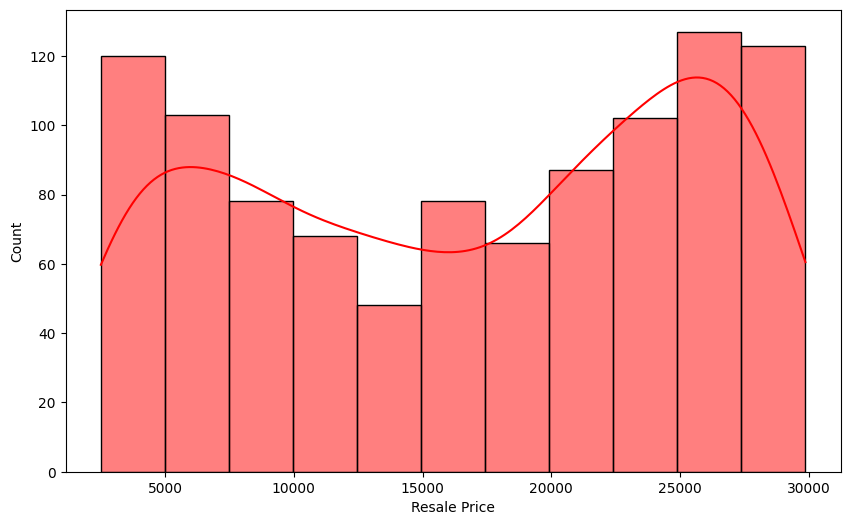

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Resale Price'],color='red',kde=True)
plt.title=("distibation of price ")
plt.xlabel=("price")
plt.ylabel=("fraqancy")
plt.show()

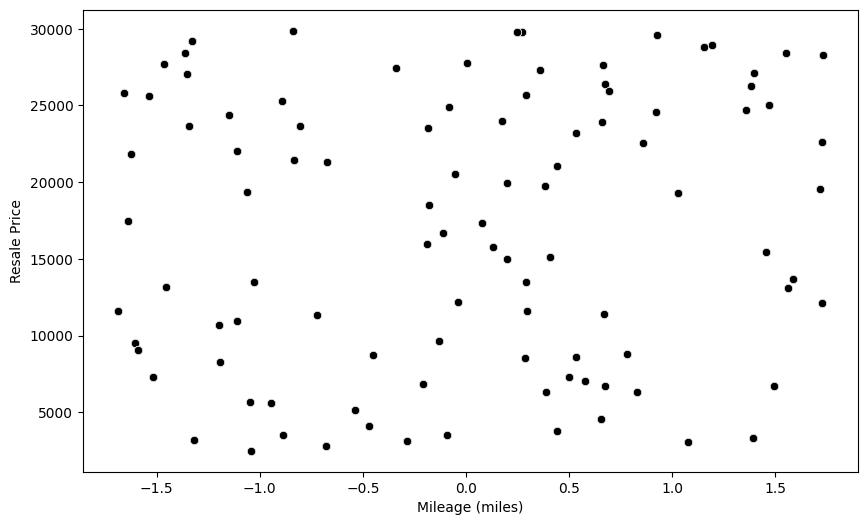

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Mileage (miles)'],y=data['Resale Price'],color='black')
plt.title=("Relation between mileage and price  ")
plt.xlabel=("mileage")
plt.ylabel=("price")
plt.show()

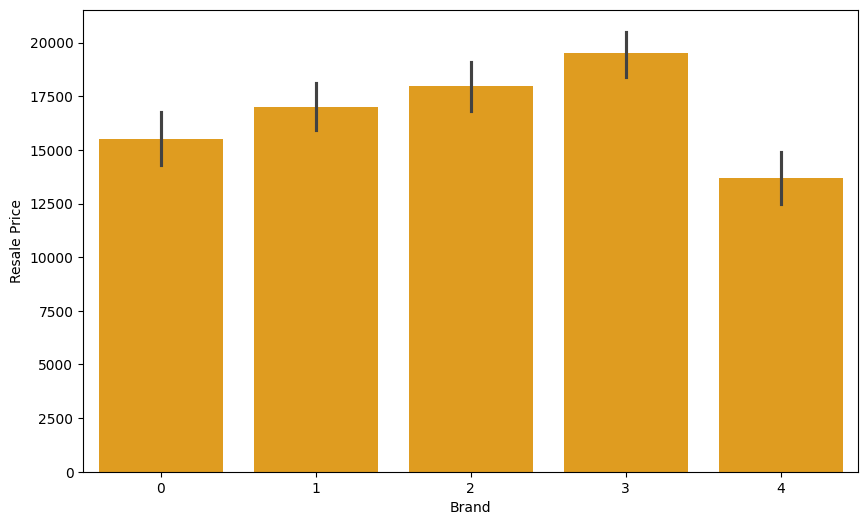

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Brand'],y=data['Resale Price'],color='orange')
plt.title=("Impact brand on price  ")
plt.xlabel=("brand")
plt.ylabel=("price")
plt.show()

In [ ]:
x=data.drop(columns='Resale Price',axis=1)
y=data['Resale Price']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()
de=DecisionTreeRegressor()
ra=RandomForestRegressor()


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
de.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
ra.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)
y_pred_ra=ra.predict(x_test)

In [ ]:
print("MSE lr",mean_absolute_error(y_test,y_pred_lr))
print("MSE lr",mean_squared_error(y_test,y_pred_lr))
print("R2_score lr",r2_score(y_test,y_pred_lr))

MSE lr 7722.679898278406
MSE lr 73958359.27137384
R2_score lr 0.02408389484532758


In [ ]:
print("MSE de",mean_absolute_error(y_test,y_pred_de))
print("MSE de",mean_squared_error(y_test,y_pred_de))
print("R2_score de",r2_score(y_test,y_pred_de))

MSE de 0.0
MSE de 0.0
R2_score de 1.0


In [ ]:
print("MSE ra",mean_absolute_error(y_test,y_pred_ra))
print("MSE ra",mean_squared_error(y_test,y_pred_ra))
print("R2_score ra",r2_score(y_test,y_pred_ra))

MSE ra 43.37434999999999
MSE ra 63486.778696499954
R2_score ra 0.999162261434614


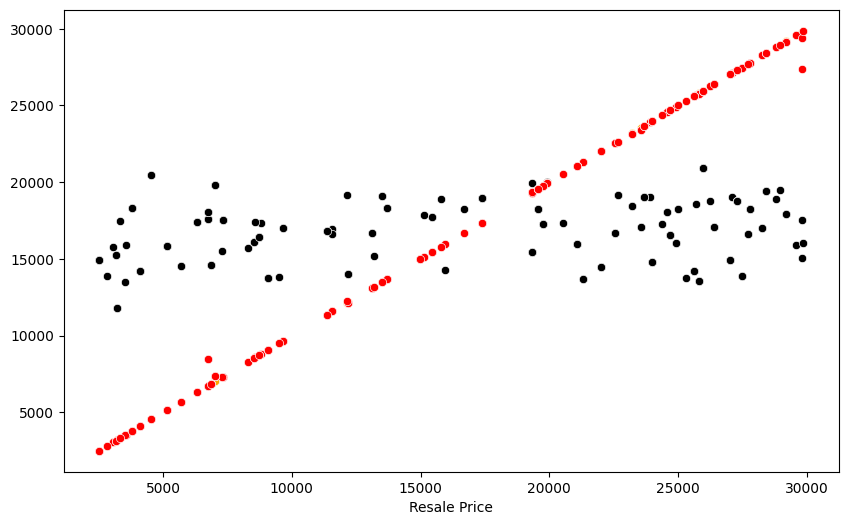

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred_lr,color='black')
sns.scatterplot(x=y_test,y=y_pred_de,color='orange')
sns.scatterplot(x=y_test,y=y_pred_ra,color='red')



plt.show()

In [ ]:
grid_params={
    'max_depth':[10,20,30,40,50],
    'max_leaf_nodes':[20,30,40,50,60]
}
grid_model=GridSearchCV(de,grid_params,cv=5)
grid_model.fit(x_train,y_train)
grid_model.best_params_

{'max_depth': 20, 'max_leaf_nodes': 60}

In [ ]:
y_pred_grid=grid_model.best_estimator_.predict(x_test)


In [ ]:
print("MSA",mean_absolute_error(y_test,y_pred_grid))
print("MSA",mean_squared_error(y_test,y_pred_grid))
print("r2",r2_score(y_test,y_pred_grid))

MSA 587.1563612898386
MSA 918712.5562841737
r2 0.9878771461601018


In [ ]:
random_params={
    'max_depth':[10,20,30,40,50],
    'n_estimators':[100,200,300,400,500]


}
random_model=RandomizedSearchCV(ra,random_params,cv=5)
random_model.fit(x_train,y_train)
random_model.best_params_

{'n_estimators': 500, 'max_depth': 30}

In [ ]:
y_pred_random=random_model.best_estimator_.predict(x_test)

In [ ]:
print("MSA",mean_absolute_error(y_test,y_pred_random))
print("MSA",mean_squared_error(y_test,y_pred_random))
print("r2",r2_score(y_test,y_pred_random))

MSA 50.46003999999989
MSA 56344.09121191998
r2 0.9992565126297319


In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
data.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission', 'Resale Price'],
      dtype='object')

In [ ]:
def cars_price(Brand, Model_Year, Mileage , Fuel_Type, Condition,Transmission):
  try:
    input_data=pd.DataFrame({
        'Brand':[Brand],
        'Model Year':[Model_Year],
        'Mileage (miles)':[Mileage],
        'Fuel Type':[ Fuel_Type],
        'Condition':[Condition],
        'Transmission':[Transmission]
        })
    for col in encode:
      input_data[col]=le[col].transform(input_data[col])
    input_data[scall]=sc.transform(input_data[scall])
    prediction=ra.predict(input_data)
    return f"prdict house car ${prediction[0]:,.2f}"
  except Exception as e:
    return str(e)
gr.Interface(
    fn=cars_price,
    inputs=[
        gr.Dropdown(['Ford', 'BMW', 'Honda', 'Toyota', 'Chevrolet'],label='Brand'),
        gr.Number(label='Model Year'),
        gr.Number(label='Mileage (miles)'),
        gr.Dropdown(['Electric', 'Diesel', 'Gasoline'],label='Fuel Type'),
        gr.Number(label='Condition'),
        gr.Dropdown(['Automatic', 'Manual'],label='Transmission')
    ],
    outputs=gr.Textbox(label='prediction'),
    title="Predict Car Price"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://52c58bc86916475366.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
data.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission', 'Resale Price'],
      dtype='object')

In [ ]:
data.head()

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,-0.045609,0.855974,1,-0.775749,0,22570
1,0,1.702480,1.027527,1,-0.081256,0,19312
2,2,-0.681278,0.198653,0,-0.775749,0,14972
3,3,0.590060,0.290454,2,0.613237,1,25714
4,3,1.066811,-0.834121,0,0.613237,0,21456
